# Question 1: Breast Cancer Data using Classification Model

In [333]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer

breast_cancer_dataset = load_breast_cancer() #loading the dataset

In [334]:
print(breast_cancer_dataset.DESCR) 

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [335]:
breast_cancer_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [336]:
target_data = breast_cancer_dataset.target
#target_data

In [337]:
breast_cancer_dataset.data.shape  #loading the shape of the dataframe

(569, 30)

### a) How many features does the breast cancer dataset possess? Specify the nature of the classification problem (i.e. binary vs. multinomial, and balanced vs. unbalanced).

In [338]:
column_names = breast_cancer_dataset.feature_names #loading the feature names
column_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [339]:
print("Total number of features in the breast cancer dataset: ", len(column_names))

Total number of features in the breast cancer dataset:  30


In [340]:
target_names = breast_cancer_dataset.target_names  #loading the target names
target_names

array(['malignant', 'benign'], dtype='<U9')

As we can clearly see here, Target has two variables: malignant and bengin. Which makes it a classic binary classification.

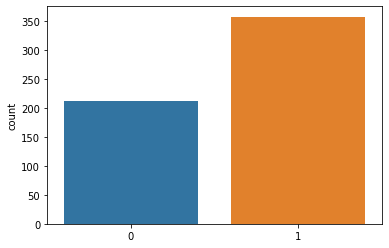

In [341]:
import seaborn as sns

sns.countplot(x=breast_cancer_dataset["target"])


In this dataset we learn from it's description that in 'target' 0 - malignant and 1 - bengin. From the countplot above we can see that there are around 200 malignant and around 350 are bengin. Which clearly means it is an unbalanced dataset. 



### b) Implement a random forest classiffier on the whole dataset and identify the 10 most relevant features. For the rest of the problem, focus on these 10 features.




In [342]:
columns_data = breast_cancer_dataset.data
columns_data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

**Split Data into a trainning and testing sets**

In [343]:
from sklearn.model_selection import train_test_split

#spliting the dataset
X_train, X_test, y_train, y_test = train_test_split(columns_data, target_data, test_size = 0.2, random_state = 34)

In [344]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
rd = RandomForestClassifier(n_estimators=300, max_depth = 5,  min_samples_split = 3) #Implimenting the random forest model
rd.fit(X_train,y_train)#fiting the model
rd_pred = rd.predict(X_test)

rd_acc = accuracy_score(y_test, rd_pred)
clf_rd = classification_report(y_test, rd_pred)
print(f"Accuracy Score of Random Forest is : {rd_acc}")
print(f"Classification Report : \n{clf_rd}")

Accuracy Score of Random Forest is : 0.956140350877193
Classification Report : 
              precision    recall  f1-score   support

           0       0.95      0.92      0.93        38
           1       0.96      0.97      0.97        76

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [345]:
#identifying the ten most relevant features
important = list(rd.feature_importances_)
names = list(column_names)
df = {'Feature_Names': names,'Importance': important}
df = pd.DataFrame(df)  

df_sort = df.sort_values(by='Importance',ascending=False) #sorting the dataframe
print(df_sort[:10]) #printing the 10 relevant features

           Feature_Names  Importance
23            worst area    0.136974
22       worst perimeter    0.128080
27  worst concave points    0.121523
7    mean concave points    0.103737
20          worst radius    0.089648
6         mean concavity    0.060605
3              mean area    0.056774
2         mean perimeter    0.051247
26       worst concavity    0.038936
0            mean radius    0.036262


In [346]:
p = df_sort.index[:10]
p

Int64Index([23, 22, 27, 7, 20, 6, 3, 2, 26, 0], dtype='int64')

### c) Split the data into train and test with the test size being 0:2 of the size of the whole dataset.

In [347]:
columns_data = np.array(columns_data)[:, p] #selecting the top 10 important features
column_names = list(df_sort.copy().Feature_Names[:10])#geting feature names

In [348]:
from sklearn.preprocessing import OneHotEncoder
def encode(y):
  enc = OneHotEncoder(handle_unknown='ignore')
  x = np.array(y)
  x = x.reshape(-1, 1)
  y = enc.fit_transform(x).toarray()
  return y
y = encode(target_data) #calling the function to encute the one-hot-encoding

In [349]:
#spliting the dataset
X_train, X_test, y_train, y_test = train_test_split(columns_data, target_data, test_size = 0.2, random_state = 38)

### d) Build a Neural Network Model

In [350]:
#!pip install tensorflow

In [351]:
#Import Required Packages
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score , mean_absolute_percentage_error
import matplotlib.pyplot as plt
import tensorflow 
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
from tensorflow.python.keras import regularizers

In [352]:
# ANN Model Layers
model = Sequential()
model.add(Dense(520, input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(250, activation="relu"))
model.add(Dense(80, activation="relu", kernel_regularizer=regularizers.l2(0.0001) ))
model.add(Dense(80, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(80, activation="relu", kernel_regularizer=regularizers.l2(0.0001) ))
model.add(Dense(80, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(20, activation="sigmoid"))
model.add(Dense(1, activation="sigmoid",name= 'Classification_Layer'))

In [353]:
# Model Metric & Optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Trainning 
history = model.fit(X_train, y_train, epochs=30, batch_size=80, validation_data=(X_test, y_test), verbose=1)

Epoch 1/30
6/6 [==============================] - 1s 44ms/step - loss: 0.7266 - accuracy: 0.5407 - val_loss: 0.6441 - val_accuracy: 0.6842
Epoch 2/30
6/6 [==============================] - 0s 9ms/step - loss: 0.7005 - accuracy: 0.6088 - val_loss: 0.6465 - val_accuracy: 0.6842
Epoch 3/30
6/6 [==============================] - 0s 8ms/step - loss: 0.7133 - accuracy: 0.6110 - val_loss: 0.6464 - val_accuracy: 0.6842
Epoch 4/30
6/6 [==============================] - 0s 8ms/step - loss: 0.7040 - accuracy: 0.6044 - val_loss: 0.6497 - val_accuracy: 0.6842
Epoch 5/30
6/6 [==============================] - 0s 8ms/step - loss: 0.6879 - accuracy: 0.6110 - val_loss: 0.6506 - val_accuracy: 0.6842
Epoch 6/30
6/6 [==============================] - 0s 8ms/step - loss: 0.6838 - accuracy: 0.6022 - val_loss: 0.6430 - val_accuracy: 0.6842
Epoch 7/30
6/6 [==============================] - 0s 8ms/step - loss: 0.6800 - accuracy: 0.6000 - val_loss: 0.6124 - val_accuracy: 0.7719
Epoch 8/30
6/6 [=================

In [354]:
# Accuracy
test_loss, test_acc = model.evaluate(X_test, y_test)
print('\nAccuracy of the model',test_acc)

4/4 [==============================] - 0s 4ms/step - loss: 0.6457 - accuracy: 0.6842

Accuracy of the model 0.6842105388641357


In [355]:
##PREDICTION
from sklearn.metrics import classification_report,confusion_matrix
prediction = model.predict(X_test)
#prediction

4/4 [==============================] - 0s 3ms/step


In [356]:
print(classification_report(y_test,prediction.round()))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.68      1.00      0.81        78

    accuracy                           0.68       114
   macro avg       0.34      0.50      0.41       114
weighted avg       0.47      0.68      0.56       114



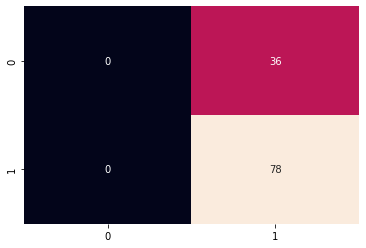

In [357]:
matrix= confusion_matrix(y_test , prediction.round())
sns.heatmap(matrix,cbar=False, annot=True)

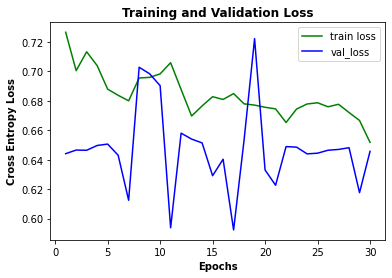

In [358]:
## Plot for loss per epochs
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,31)
plt.plot(epochs, loss, 'g', label='train loss')
plt.plot(epochs, val_loss, 'b', label='val_loss')
plt.title('Training and Validation Loss', fontweight='bold')
plt.xlabel('Epochs', fontweight='bold')
plt.ylabel('Cross Entropy Loss', fontweight='bold')
plt.legend()
plt.show()

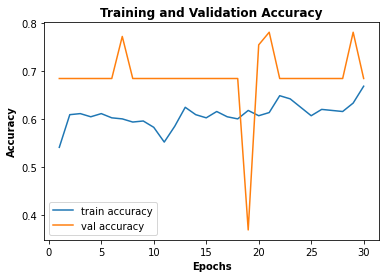

In [359]:
## Plot for accuracy per epochs

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1,31)
plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.title('Training and Validation Accuracy', fontweight='bold')
plt.xlabel('Epochs', fontweight='bold')
plt.ylabel("Accuracy", fontweight='bold')
plt.legend()
plt.show()


### e) Employ the logistic regression for the same classiffcation problem. Carefully assess the performance of logistic regression on this dataset.

In logistic Regression, we are using two parameters such as,
Solver = Libliner
Maximum Iteration is 1000.
The created logistic regression, as demonstrated below.

In [360]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(solver='liblinear',max_iter=1000)
log.fit(X_train,y_train)

y_pred_log = log.predict(X_test)

clf_report = classification_report(y_test, y_pred_log)
acc_log = accuracy_score(y_test, y_pred_log)
print(f"Accuracy Score of Logistic Regression is : {acc_log}")
print(f"\nClassification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.9473684210526315

Classification Report : 
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        36
           1       0.95      0.97      0.96        78

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



According to the result, the created logistic regression model has around 95% accuracy for prediciting the breast cancer. 

Logistic Regression model has acheived better accuracy than the previous Neural Network model. I believe overfitting is the reason why neural network's accuracy is effected. LR model predicts bengin tumors marginally better than malignant tumors as we can see from their respective f1-scores in the classification report.

I think it will be best to use LR model for this classification task.

# Question 2: MNIST Data using CNN Model

In [361]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as k

In [362]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 1s 0us/step


In [363]:
# building the input vector from the 28x28 pixels
img_rows, img_cols=28, 28
 
if k.image_data_format() == 'channels_first':
   x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
   x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
   inpx = (1, img_rows, img_cols)
 
else:
   x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
   x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
   inpx = (img_rows, img_cols, 1)
 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalizing the data to help with the training
x_train /= 255
x_test /= 255


In [364]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [365]:
inpx = Input(shape=inpx)
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx)
layer2 = Conv2D(64, (3, 3), activation='relu')(layer1)
layer3 = MaxPooling2D(pool_size=(3, 3))(layer2)
layer4 = Dropout(0.5)(layer3)
layer5 = Flatten()(layer4)# flatten output of conv
layer6 = Dense(250, activation='sigmoid')(layer5)
layer7 = Dense(10, activation='softmax')(layer6)

In [366]:
model = Model([inpx], layer7)
# compiling the model
model.compile(optimizer=keras.optimizers.Adadelta(),
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

# training the model for 30 epochs
model_history = model.fit(x_train, y_train, epochs=30, batch_size=30) 

Epoch 1/30
2000/2000 [==============================] - 14s 4ms/step - loss: 2.3461 - accuracy: 0.1237
Epoch 2/30
2000/2000 [==============================] - 7s 3ms/step - loss: 2.2775 - accuracy: 0.2459
Epoch 3/30
2000/2000 [==============================] - 7s 3ms/step - loss: 2.2084 - accuracy: 0.4288
Epoch 4/30
2000/2000 [==============================] - 7s 3ms/step - loss: 2.1112 - accuracy: 0.5904
Epoch 5/30
2000/2000 [==============================] - 7s 3ms/step - loss: 1.9561 - accuracy: 0.6417
Epoch 6/30
2000/2000 [==============================] - 7s 3ms/step - loss: 1.7230 - accuracy: 0.6866
Epoch 7/30
2000/2000 [==============================] - 7s 4ms/step - loss: 1.4487 - accuracy: 0.7161
Epoch 8/30
2000/2000 [==============================] - 7s 4ms/step - loss: 1.2069 - accuracy: 0.7361
Epoch 9/30
2000/2000 [==============================] - 7s 4ms/step - loss: 1.0333 - accuracy: 0.7560
Epoch 10/30
2000/2000 [==============================] - 7s 4ms/step - loss: 0.91

In [367]:
score = model.evaluate(x_test, y_test, verbose=0)
print('loss=', score[0])
print('accuracy=', score[1])

loss= 0.36905503273010254
accuracy= 0.8963000178337097


In [368]:
from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
prediction = model.predict(x_test)
prediction

313/313 [==============================] - 1s 2ms/step


array([[2.11763327e-04, 6.01070424e-05, 2.26220727e-04, ...,
        9.96277750e-01, 7.83265510e-04, 1.28353573e-03],
       [1.24002416e-02, 1.87928416e-02, 8.50612700e-01, ...,
        1.14603121e-04, 1.94185078e-02, 1.45402591e-04],
       [1.56614784e-04, 9.79030669e-01, 5.20691415e-03, ...,
        2.30313581e-03, 5.91649348e-03, 1.04857096e-03],
       ...,
       [1.72341039e-04, 9.92224319e-04, 2.82556372e-04, ...,
        3.19954306e-02, 3.50011215e-02, 3.23782802e-01],
       [2.44902894e-02, 8.99507850e-03, 1.29313255e-03, ...,
        1.18780965e-02, 4.70512420e-01, 1.08194398e-02],
       [9.57726408e-03, 1.81192110e-04, 1.03322985e-02, ...,
        5.73350735e-05, 5.02333161e-04, 3.12147051e-04]], dtype=float32)

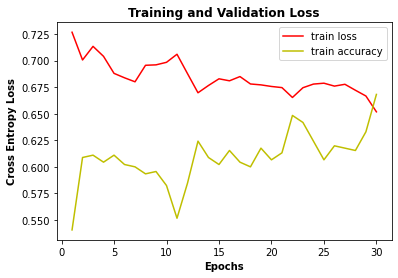

In [369]:
## Plot for loss and accuracy per epochs
loss = history.history['loss']
accu = history.history['accuracy']
epochs = range(1,31)
plt.plot(epochs, loss, 'r', label='train loss')
plt.plot(epochs, accu, 'y', label='train accuracy')
plt.title('Training and Validation Loss', fontweight='bold')
plt.xlabel('Epochs', fontweight='bold')
plt.ylabel('Cross Entropy Loss', fontweight='bold')
plt.legend()
plt.show()

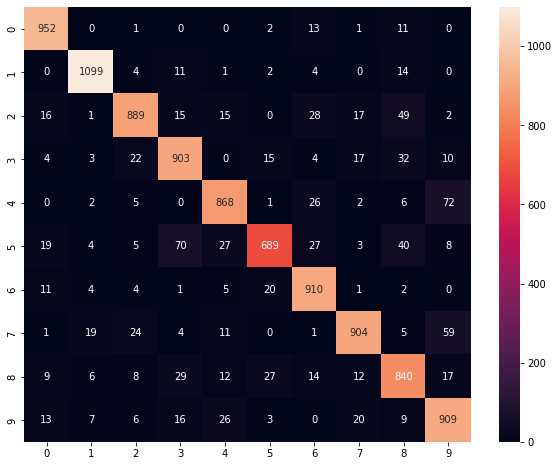

In [370]:
#Displaying Confusion Matrix
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
plt.figure(figsize=(10,8))
ax= plt.subplot()
matrix= confusion_matrix(np.asarray(y_test).argmax(axis=1), np.asarray(prediction).argmax(axis=1))
sns.heatmap(matrix,cbar=True, annot=True, ax=ax, fmt='g')
plt.show()

In [371]:
print(classification_report(y_test,prediction.round()))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       980
           1       0.98      0.96      0.97      1135
           2       0.94      0.83      0.88      1032
           3       0.90      0.85      0.87      1010
           4       0.94      0.84      0.89       982
           5       0.94      0.68      0.79       892
           6       0.92      0.93      0.93       958
           7       0.94      0.85      0.90      1028
           8       0.89      0.80      0.84       974
           9       0.87      0.86      0.86      1009

   micro avg       0.93      0.86      0.89     10000
   macro avg       0.93      0.86      0.89     10000
weighted avg       0.93      0.86      0.89     10000
 samples avg       0.86      0.86      0.86     10000



As per the result, the created CNN model has 89.6% of accuracy for classifying the selected random images.


As this model has an accuracy of almost 90%, we can interpret that the model is less overfitting and has low bias. Since accuracy metrics doesn't provide information regarding false positive rate and false negative rate, we can't solely rely upon them. 

# Question 3:  Tesla Data using RNN Model

In [372]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [373]:
data = pd.read_csv("https://raw.githubusercontent.com/SravaniRVS/DATA602/main/Homeworks/Tesla-Stocks.csv")
data = data.round(3)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.00,25.00,17.54,23.89,23.89,18766300
1,2010-06-30,25.79,30.42,23.30,23.83,23.83,17187100
2,2010-07-01,25.00,25.92,20.27,21.96,21.96,8218800
3,2010-07-02,23.00,23.10,18.71,19.20,19.20,5139800
4,2010-07-06,20.00,20.00,15.83,16.11,16.11,6866900


In [374]:
fig = px.line(
    data.reset_index(), x="Date", y="Close", title="Tesla Stock Price - Close"
)
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [375]:
def create_dataset(dataset, look_back=60):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i : (i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return pd.DataFrame(np.array(dataX)), np.array(dataY)


X_close, Y_close = create_dataset(data[["Close"]].values)
aux = X_close
aux["Target"] = Y_close
aux

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,Target
0,23.89,23.83,21.96,19.20,16.11,15.80,17.46,17.40,17.05,18.14,...,20.17,20.72,21.12,21.98,20.94,20.23,21.06,20.77,19.87,19.56
1,23.83,21.96,19.20,16.11,15.80,17.46,17.40,17.05,18.14,19.84,...,20.72,21.12,21.98,20.94,20.23,21.06,20.77,19.87,19.56,20.10
2,21.96,19.20,16.11,15.80,17.46,17.40,17.05,18.14,19.84,19.89,...,21.12,21.98,20.94,20.23,21.06,20.77,19.87,19.56,20.10,20.53
3,19.20,16.11,15.80,17.46,17.40,17.05,18.14,19.84,19.89,20.64,...,21.98,20.94,20.23,21.06,20.77,19.87,19.56,20.10,20.53,21.40
4,16.11,15.80,17.46,17.40,17.05,18.14,19.84,19.89,20.64,21.91,...,20.94,20.23,21.06,20.77,19.87,19.56,20.10,20.53,21.40,21.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,315.01,314.92,313.31,317.47,317.22,326.58,335.54,337.14,345.09,349.93,...,537.92,518.50,513.49,510.50,547.20,569.56,572.20,564.82,558.02,566.90
2352,314.92,313.31,317.47,317.22,326.58,335.54,337.14,345.09,349.93,346.11,...,518.50,513.49,510.50,547.20,569.56,572.20,564.82,558.02,566.90,580.99
2353,313.31,317.47,317.22,326.58,335.54,337.14,345.09,349.93,346.11,349.35,...,513.49,510.50,547.20,569.56,572.20,564.82,558.02,566.90,580.99,640.81
2354,317.47,317.22,326.58,335.54,337.14,345.09,349.93,346.11,349.35,352.17,...,510.50,547.20,569.56,572.20,564.82,558.02,566.90,580.99,640.81,650.57


In [376]:
del aux

In [377]:
def split_dataset(X, Y):
    X_train = X[:-100].values
    y_train = Y[:-100]

    X_test = X[-100:].values
    y_test = Y[-100:]
    return X_train, y_train, X_test, y_test


# Close dataset
X_train_close, y_train_close, X_test_close, y_test_close = split_dataset(
    X_close, Y_close
)

In [378]:
from sklearn.preprocessing import MinMaxScaler

sc_close_x = MinMaxScaler()
sc_close_y = MinMaxScaler()

# X Scale
X_train_close_scaled = sc_close_x.fit_transform(X_train_close).reshape(
    *X_train_close.shape, 1
)
X_test_close_scaled = sc_close_x.transform(X_test_close).reshape(*X_test_close.shape, 1)

# Y Scale
y_train_close_scaled = sc_close_y.fit_transform(y_train_close.reshape(-1, 1)).reshape(
    -1
)
y_test_close_scaled = sc_close_y.transform(y_test_close.reshape(-1, 1)).reshape(-1)

In [379]:
print(X_train_close_scaled.shape)
print(y_train_close_scaled.shape)

(2256, 61, 1)
(2256,)


In [380]:
%%time 

import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

def gen_model():
    rnn = Sequential()
    rnn.add(LSTM(units=20, return_sequences=True, input_shape=(X_train_close_scaled.shape[1], 1)))
    rnn.add(Dropout(0.2))
    rnn.add(LSTM(units=25, return_sequences=True))
    rnn.add(Dropout(0.2))
    rnn.add(LSTM(units=30, return_sequences=True))
    rnn.add(Dropout(0.2))
    rnn.add(LSTM(units=35, return_sequences=True))
    rnn.add(Dropout(0.2))
    rnn.add(LSTM(units=40, return_sequences=True))
    rnn.add(Dropout(0.2))
    rnn.add(LSTM(units=45, return_sequences=True))
    rnn.add(Dropout(0.2))
    rnn.add(LSTM(units=50, return_sequences=True))
    rnn.add(Dropout(0.2))
    rnn.add(LSTM(units=360))
    rnn.add(Dropout(0.2))
    rnn.add(Dense(units=1,activation='relu'))
    rnn.compile(optimizer="adam", loss=["mean_squared_error",'cosine_similarity'])
    callback = keras.callbacks.EarlyStopping(
        monitor="val_loss",
        min_delta=0,
        patience=0,
        verbose=False,
        mode="auto",
        baseline=None,
        restore_best_weights=False,
    )
    return rnn

rnn = gen_model()
history = rnn.fit(X_train_close_scaled, y_train_close_scaled,validation_data=(X_test_close_scaled,y_test_close_scaled), epochs=10, batch_size=32)

Epoch 1/10
71/71 [==============================] - 17s 64ms/step - loss: 0.0292 - val_loss: 0.1094
Epoch 2/10
71/71 [==============================] - 2s 29ms/step - loss: 0.0066 - val_loss: 0.1309
Epoch 3/10
71/71 [==============================] - 2s 28ms/step - loss: 0.0067 - val_loss: 0.0897
Epoch 4/10
71/71 [==============================] - 2s 29ms/step - loss: 0.0064 - val_loss: 0.1453
Epoch 5/10
71/71 [==============================] - 2s 30ms/step - loss: 0.0057 - val_loss: 0.0625
Epoch 6/10
71/71 [==============================] - 2s 29ms/step - loss: 0.0059 - val_loss: 0.1015
Epoch 7/10
71/71 [==============================] - 2s 29ms/step - loss: 0.0051 - val_loss: 0.0520
Epoch 8/10
71/71 [==============================] - 2s 28ms/step - loss: 0.0051 - val_loss: 0.0633
Epoch 9/10
71/71 [==============================] - 2s 29ms/step - loss: 0.0043 - val_loss: 0.0478
Epoch 10/10
71/71 [==============================] - 2s 29ms/step - loss: 0.0043 - val_loss: 0.0666
CPU time

In [381]:
history_df = pd.DataFrame(history.history)
go.Figure() \
.add_trace(go.Scatter(x=history_df.index, y=history_df.loss, mode="lines", name="Train Loss")) \
.add_trace(go.Scatter(x=history_df.index, y=history_df.val_loss, mode="lines", name="Validation Loss")) \
.update_layout(
    title="Train Metrics",
    xaxis_title="Epochs",
    yaxis_title="Loss",
)


In [382]:
# Model
y_pred = rnn.predict(X_test_close_scaled)
y_true = y_test_close_scaled
test_dates = data.reset_index()["Date"][-100:]

# Original values
y_pred_original = sc_close_y.inverse_transform(y_pred.reshape(-1, 1)).reshape(-1)
y_true_original = sc_close_y.inverse_transform(y_true.reshape(-1, 1)).reshape(-1)

4/4 [==============================] - 3s 19ms/step


In [383]:
# Create traces
go.Figure().add_trace(
    go.Scatter(x=test_dates, y=y_true_original, mode="lines", name="Real Close",)
).add_trace(
    go.Scatter(x=test_dates, y=y_pred_original, mode="lines", name="Predicted Close",)
).update_layout(
    title="Stock price - Tesla Motors",
    xaxis_title="Date",
    yaxis_title="Stock price ($)",
).show()

print("r2_score close :", r2_score(y_true, y_pred))
print("mean_squared_error close:", mean_squared_error(y_true, y_pred))

r2_score close : 0.3232833812306103
mean_squared_error close: 0.06662731272041328


As we can see from all the results from above, T increases the accuracy of the model, and it is also a contributor to overfittind and underfitting of the data.

According to the RNN model result, the mean squared error is arount 6%. Thus, the considered loss of the model is around 6%, and the accuracy is 94% for predicting the Tesla stock price data.

#Question 4: Dimensionality Reduction and Clustering of Food Items

In [384]:
import numpy as np
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/SravaniRVS/DATA602/main/Homeworks/food-nutrients.csv") #Data Importing
df.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


Identification and treatment of any Missing Values

In [385]:
df.isnull().sum()

ID                     0
FoodGroup              0
ShortDescrip           0
Descrip                0
CommonName          7555
MfgName             7058
ScientificName      7886
Energy_kcal            0
Protein_g              0
Fat_g                  0
Carb_g                 0
Sugar_g                0
Fiber_g                0
VitA_mcg               0
VitB6_mg               0
VitB12_mcg             0
VitC_mg                0
VitE_mg                0
Folate_mcg             0
Niacin_mg              0
Riboflavin_mg          0
Thiamin_mg             0
Calcium_mg             0
Copper_mcg             0
Iron_mg                0
Magnesium_mg           0
Manganese_mg           0
Phosphorus_mg          0
Selenium_mcg           0
Zinc_mg                0
VitA_USRDA             0
VitB6_USRDA            0
VitB12_USRDA           0
VitC_USRDA             0
VitE_USRDA             0
Folate_USRDA           0
Niacin_USRDA           0
Riboflavin_USRDA       0
Thiamin_USRDA          0
Calcium_USRDA          0


Remove Common Name, Mfg Name, and Scientific Name

In [386]:
df1 = df.drop(['CommonName','MfgName','ScientificName'],axis=1)

In [387]:
df1.head()

,ID,FoodGroup,ShortDescrip,Descrip,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",717.0,0.85,81.11,0.06,0.06,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",717.0,0.85,81.11,0.06,0.06,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",876.0,0.28,99.48,0.00,0.00,0.0,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",353.0,21.40,28.74,2.34,0.50,0.0,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",371.0,23.24,29.68,2.79,0.51,0.0,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


### b) Automatically Remove USRDA Column Title

In [388]:
for col in df1.columns:
    if 'USRDA' in col:
        del df1[col]
  
df1

,ID,FoodGroup,ShortDescrip,Descrip,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",717.0,0.85,81.11,0.06,0.06,0.0,...,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",717.0,0.85,81.11,0.06,0.06,0.0,...,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",876.0,0.28,99.48,0.00,0.00,0.0,...,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",353.0,21.40,28.74,2.34,0.50,0.0,...,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",371.0,23.24,29.68,2.79,0.51,0.0,...,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,83110,Finfish and Shellfish Products,"MACKEREL,SALTED","Fish, mackerel, salted",305.0,18.50,25.10,0.00,0.00,0.0,...,0.190,0.020,66.0,0.100,1.40,60.0,0.000,254.0,73.4,1.10
8614,90240,Finfish and Shellfish Products,"SCALLOP,(BAY&SEA),CKD,STMD","Mollusks, scallop, (bay and sea), cooked, steamed",111.0,20.54,0.84,5.41,0.00,0.0,...,0.024,0.012,10.0,0.033,0.58,37.0,0.029,426.0,21.7,1.55
8615,90480,Sweets,"SYRUP,CANE","Syrup, Cane",269.0,0.00,0.00,73.14,73.20,0.0,...,0.060,0.130,13.0,0.020,3.60,10.0,0.000,8.0,0.7,0.19
8616,90560,Finfish and Shellfish Products,"SNAIL,RAW","Mollusks, snail, raw",90.0,16.10,1.40,2.00,0.00,0.0,...,0.120,0.010,10.0,0.400,3.50,250.0,0.000,272.0,27.4,1.00


Make a copy of Data frame

In [389]:
df5 = df1

### c) Standardize the data. After standardization, all the 23 continuous features will be dimensionless.

Removing String attributes for standarize the data

In [390]:
df2 = df1.drop(['FoodGroup','ShortDescrip','Descrip'],axis=1)
df2.head()

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,1001,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,...,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09
1,1002,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,...,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05
2,1003,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,...,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01
3,1004,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,...,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66
4,1005,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,...,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60


Standarizing the Data

In [391]:
# define standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
  
# transform data
df3 = scaler.fit_transform(df2)

In [392]:
df3

array([[-1.56891054,  2.89623357, -1.01174721, ..., -0.64991809,
        -0.41055694, -0.55991833],
       [-1.56880209,  2.89623357, -1.01174721, ..., -0.65484222,
        -0.41055694, -0.57183012],
       [-1.56869364,  3.83495634, -1.06577576, ..., -0.75332487,
        -0.44590424, -0.58374191],
       ...,
       [ 8.1350295 ,  0.25127886, -1.0923161 , ..., -0.72870421,
        -0.42116113, -0.53013886],
       [ 8.14370545, -0.80552224,  0.43375349, ...,  0.57126681,
         0.52261173, -0.28892514],
       [ 8.4733915 , -0.81142615,  0.78446513, ...,  0.11824661,
         0.14793037, -0.28892514]])

### d) Apply principal component analysis (PCA) to the standardized data.

In [393]:

from sklearn.decomposition import PCA
pca = PCA(n_components=23)
principalComponents = pca.fit_transform(df3)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4',
                          'principal component 5','principal component 6','principal component 7','principal component 8',
                         'principal component 9','principal component 10','principal component 11','principal component 12',
                         'principal component 13','principal component 14','principal component 15','principal component 16',
                         'principal component 17','principal component 18','principal component 19','principal component 20',
                         'principal component 21','principal component 21','principal component 23'])

### e) Plot the explained variance ratio by each PCA component. You can use a bar chart for this purpose. Check that the sum of all 23 ratios is indeed 1.

In [394]:
pca.explained_variance_ratio_

array([0.22705445, 0.10932716, 0.08493999, 0.07831237, 0.06815316,
       0.05281024, 0.04430844, 0.0413131 , 0.0373283 , 0.03447439,
       0.0341091 , 0.02935337, 0.02446029, 0.02103018, 0.01952495,
       0.01684261, 0.01403745, 0.01345928, 0.01313227, 0.01063479,
       0.00992057, 0.00869522, 0.0066203 ])

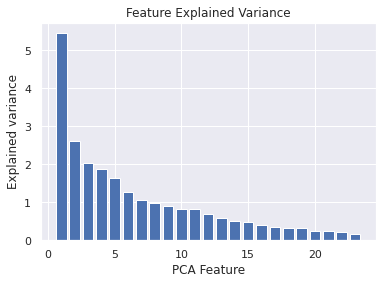

In [395]:
import matplotlib.pyplot as plt 
 
from sklearn.decomposition import PCA
sns.set()

# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

### f) Plot the cumulative explained variance ratio by PCA components.

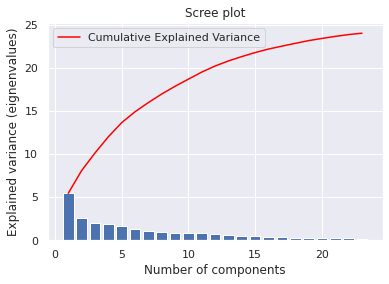

In [396]:
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
plt.plot(
    range(1,len(pca.explained_variance_ )+1),
    np.cumsum(pca.explained_variance_),
    c='red',
    label='Cumulative Explained Variance')
 
plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained variance (eignenvalues)')
plt.title('Scree plot')
 
plt.show()

In [397]:
principalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,...,principal component 14,principal component 15,principal component 16,principal component 17,principal component 18,principal component 19,principal component 20,principal component 21,principal component 21,principal component 23
0,-1.125071,-1.107756,-3.490540,0.998103,-3.075699,2.096073,0.238945,-1.152697,-0.394858,-1.128504,...,0.307431,0.718359,0.251799,0.116216,0.389367,-0.310212,0.210845,0.333503,0.169248,-0.052782
1,-1.117982,-1.109631,-3.490872,1.007875,-3.068960,2.098096,0.230866,-1.154354,-0.403860,-1.136107,...,0.309071,0.706867,0.231716,0.118737,0.388097,-0.309563,0.211164,0.312061,0.183227,-0.050352
2,-0.998147,-1.505880,-4.517329,1.221430,-3.903331,2.273010,0.287096,-1.172542,-0.454036,-1.429018,...,0.337545,0.883125,0.296434,0.188174,0.461702,-0.391381,0.285513,0.355963,0.206811,-0.083684
3,0.232486,0.646836,-1.761219,-0.888398,0.443694,1.159527,1.446967,-1.938931,0.049680,-0.167048,...,0.014042,0.418887,0.448210,0.037365,-0.289182,-0.484458,-0.449736,-0.140417,-0.503559,0.352543
4,0.297375,0.615893,-2.160134,-0.962541,0.881322,1.178677,1.854473,-2.274319,0.165405,-0.225779,...,0.069082,0.391710,0.515826,0.117053,-0.444177,-0.579398,-0.477558,-0.196406,-0.711416,0.333286


Principal Components 1 will explain the 80% of the whole variance

In [398]:
dPCA = pd.DataFrame(principalDf['principal component 1'])


In [399]:
pcf_df = pd.DataFrame(dPCA)
pcf_df.head()

,principal component 1
0,-1.125071
1,-1.117982
2,-0.998147
3,0.232486
4,0.297375


K means Clustering

In [400]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import sklearn.cluster as cluster
import sklearn.metrics as metrics

Optimal Clusterings

In [401]:
K=range(2,12)
wss = []

for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans=kmeans.fit(pcf_df)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

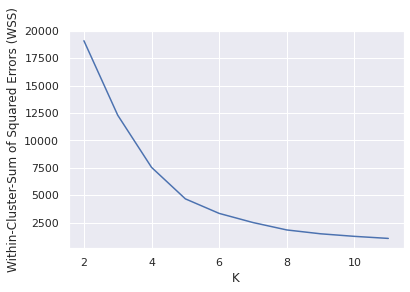

In [402]:
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)

Now we will perform K- means clustering on the data set. And since the elbow seems to start from the fifth number, it will be best to choose 5 clusters.

In [403]:
from sklearn.cluster import KMeans
KM_clust = KMeans(n_clusters= 5, init = 'k-means++',max_iter = 1000)
KM_clust.fit(pcf_df)

KMeans(max_iter=1000, n_clusters=5)

In [404]:
# Mapping on the data
pcf_df['Cluster'] = KM_clust.labels_
pcf_df['Cluster'] = 'Cluster' + pcf_df['Cluster'].astype(str)
pcf_df.head()

,principal component 1,Cluster
0,-1.125071,Cluster2
1,-1.117982,Cluster2
2,-0.998147,Cluster2
3,0.232486,Cluster0
4,0.297375,Cluster0


Cluster Visualization

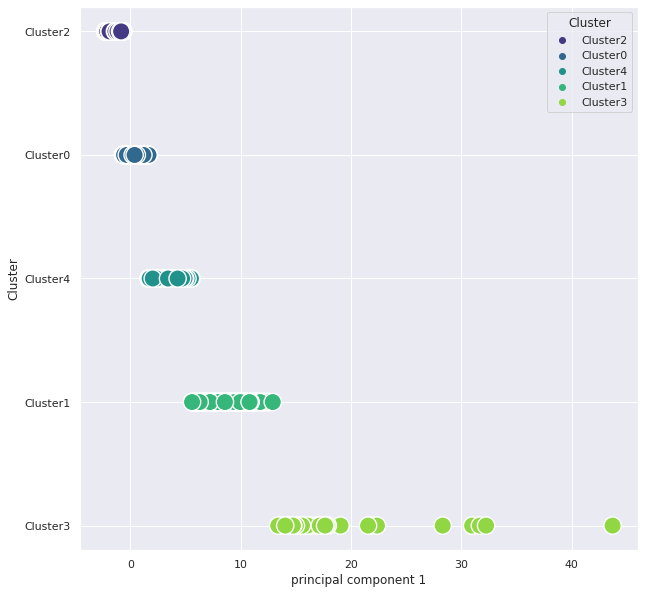

In [405]:
fig = plt.figure(figsize=(10,10))
import seaborn as sns
sns.scatterplot(x="principal component 1", y ="Cluster",hue = 'Cluster',  data=pcf_df,palette='viridis',s=300)

Cluster Size for determining the largest clusters

In [406]:
from collections import Counter
Counter(KM_clust.labels_)

Counter({2: 3515, 0: 4220, 4: 592, 1: 254, 3: 37})

In [407]:
clust_df = pd.DataFrame.from_dict(Counter(KM_clust.labels_), orient='index')
#clust_df

In [408]:
print('According to the result,', clust_df.index[0],'and', clust_df.index[1], 'are the largest clusters')

According to the result, 2 and 0 are the largest clusters


CREATE SUBSET for Food Items

In [409]:
FoodGroup_subset = df5.filter(['FoodGroup'])
FoodGroup_subset

,FoodGroup
0,Dairy and Egg Products
1,Dairy and Egg Products
2,Dairy and Egg Products
3,Dairy and Egg Products
4,Dairy and Egg Products
...,...
8613,Finfish and Shellfish Products
8614,Finfish and Shellfish Products
8615,Sweets
8616,Finfish and Shellfish Products


Total number of Food Items by food Category

In [410]:
FoodItems = FoodGroup_subset['FoodGroup'].value_counts()
FoodItems

Beef Products                          946
Vegetables and Vegetable Products      828
Baked Products                         797
Soups, Sauces, and Gravies             452
Lamb, Veal, and Game Products          438
Poultry Products                       390
Legumes and Legume Products            389
Fast Foods                             371
Breakfast Cereals                      363
Baby Foods                             362
Sweets                                 347
Fruits and Fruit Juices                346
Pork Products                          343
Beverages                              315
Finfish and Shellfish Products         267
Dairy and Egg Products                 264
Sausages and Luncheon Meats            244
Fats and Oils                          219
Cereal Grains and Pasta                183
Snacks                                 171
American Indian/Alaska Native Foods    165
Nut and Seed Products                  133
Meals, Entrees, and Side Dishes        113
Restaurant 

In [411]:
pcf_df['FoodItems'] = FoodGroup_subset
pcf_df

,principal component 1,Cluster,FoodItems
0,-1.125071,Cluster2,Dairy and Egg Products
1,-1.117982,Cluster2,Dairy and Egg Products
2,-0.998147,Cluster2,Dairy and Egg Products
3,0.232486,Cluster0,Dairy and Egg Products
4,0.297375,Cluster0,Dairy and Egg Products
...,...,...,...
8613,0.574453,Cluster0,Finfish and Shellfish Products
8614,-0.744474,Cluster2,Finfish and Shellfish Products
8615,-0.749539,Cluster2,Sweets
8616,0.373479,Cluster0,Finfish and Shellfish Products


Cluster Based on Food Category

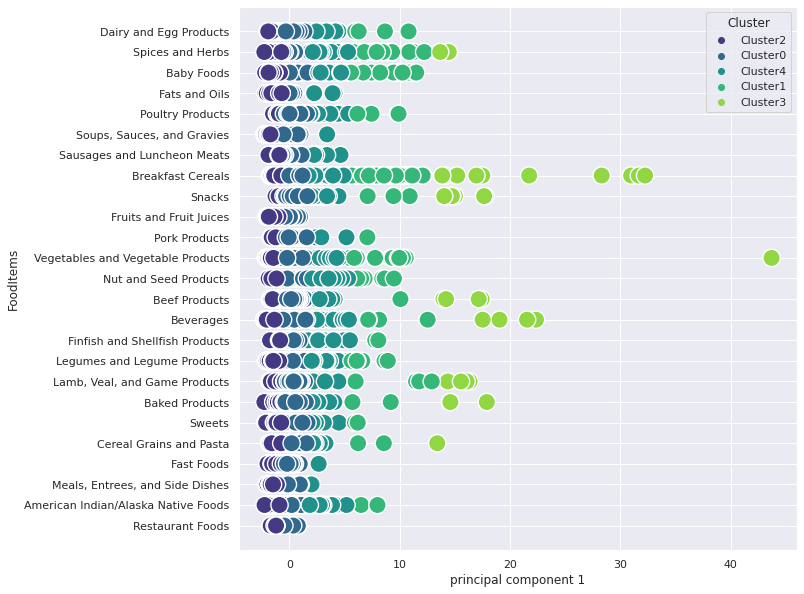

In [412]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10,10))
import seaborn as sns
sns.scatterplot(x= "principal component 1", y ="FoodItems",hue = 'Cluster',  data= pcf_df, palette='viridis',s=300)

The largest two food items based on clusters are:


*   Beef Products
*   Vegetables and Vegetable Products

